In [22]:
import numpy as np
from scipy.spatial.distance import cdist
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import make_blobs
from sklearn.metrics import rand_score
import time

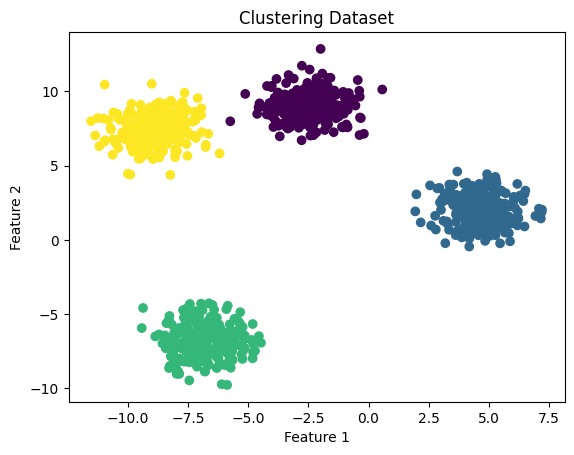

In [11]:
X, y = make_blobs(n_samples=1000, centers=4, random_state=42)

plt.scatter(X[:, 0], X[:, 1], c=y)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Clustering Dataset')
plt.show()

In [12]:
def coreset(data, m):
    N = data.shape[0]
    
    mean = np.mean(data, axis=0)
    
    q = np.linalg.norm(data - mean, axis=1)**2
    sum = np.sum(q)
    q = 0.5 * (1.0/N + q/sum)
    
    samples = np.random.choice(N, m, p=q)
    coreset = data[samples]
    weights = 1.0 / (q[samples] * m)
    
    return coreset, weights 

In [13]:
def kmeans(data, weights, k, max_iterations=15):
    data = np.asarray(data)
    
    mins = data.min(axis=0)
    maxs = data.max(axis=0)
    centroids = np.random.rand(k, data.shape[1]) * (maxs - mins) + mins
    
    for _ in range(max_iterations):
        dist = cdist(data, centroids)
        weighted_dist = dist * weights[:, np.newaxis]
        labels = np.argmin(weighted_dist, axis=1)
        
        for j in range(k):
            cluster = labels == j
            if weights[cluster].sum() > 0:
                centroids[j] = np.average(data[cluster], axis=0, weights=weights[cluster])
            else:
                centroids[j] = np.random.rand(1, data.shape[1]) * (maxs - mins) + mins
    
    return centroids


def predict(data, centroids):
    dist = cdist(data, centroids)
    labels = np.argmin(dist, axis=1)
    return labels

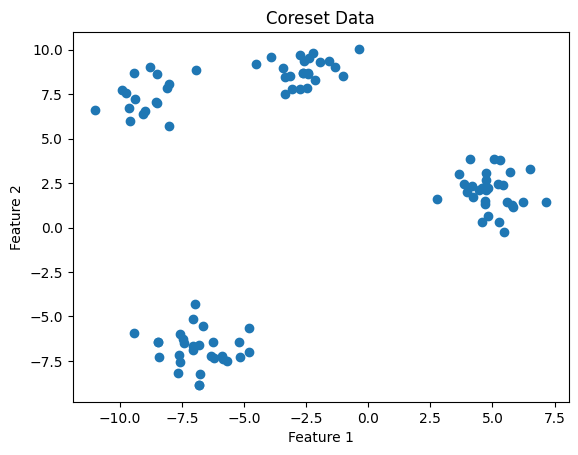

In [14]:
data_coreset, data_weights = coreset(X, 100)
plt.scatter(data_coreset[:, 0], data_coreset[:, 1])
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Coreset Data')
plt.show()


In [15]:
data_weights

array([ 8.63896926,  9.01505833, 11.93948561,  7.37445976, 10.01374212,
       10.57723194, 13.59000538,  6.15819162,  9.94842925,  7.94711363,
        7.76578345,  9.7556791 , 10.21680675,  9.34208485,  8.46029278,
        8.71993877,  7.47471624,  9.97185112, 13.2361985 , 13.32313976,
       10.5633694 , 11.5163722 ,  7.34513417,  6.15819162, 14.73277411,
        8.20114601, 11.59695233, 10.84986379, 11.76970638, 12.94013047,
       12.41333662,  7.79064304, 11.00130652,  6.6137284 ,  7.41596148,
       11.76350142, 12.2744737 ,  6.8978214 , 13.2361985 ,  9.50907381,
       11.49933968, 12.02619765, 10.10904003,  8.11595727,  9.37651859,
        8.99481926,  8.6369649 , 10.98520934, 10.06160279, 10.23137631,
       10.0237747 ,  7.89172693,  8.96253714, 15.21662895,  9.95234061,
        9.79051747, 13.18837083, 11.6303958 , 13.86303992, 10.33738462,
       10.3722655 , 10.75424069, 11.98746134, 11.98988243,  9.65273414,
        7.40773202, 12.01256757,  7.44866822, 13.70601648,  7.61

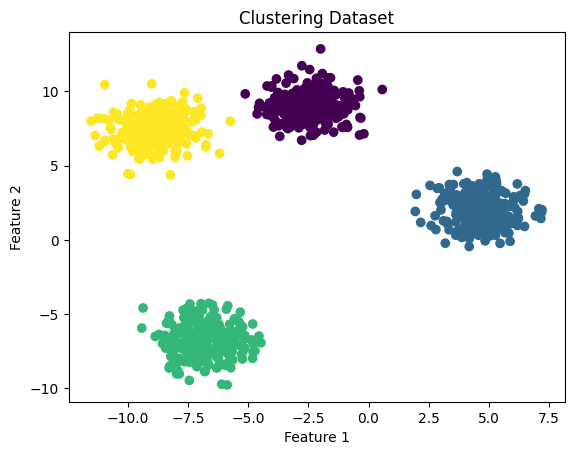

In [16]:
centroids_coreset = kmeans(data_coreset, data_weights, 4, 15)
labels_coreset = predict(X, centroids_coreset)

plt.scatter(X[:, 0], X[:, 1], c=labels_coreset)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Clustering Dataset')
plt.show()

In [17]:
from keras.datasets import mnist
import numpy as np

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

train_images = train_images / 255.0
test_images = test_images / 255.0

test_images_vector = test_images.reshape(test_images.shape[0], -1)
train_images_vector = train_images.reshape(train_images.shape[0], -1)

print(np.shape(test_images_vector))
print(np.shape(train_images_vector))

(10000, 784)
(60000, 784)


In [18]:
image_coreset, image_weights = coreset(train_images_vector, 1000)

In [24]:
tic = time.time()
image_centroids = kmeans(train_images_vector, np.ones(train_images_vector.shape[0]), 10, 100)
image_labels = predict(test_images_vector, image_centroids)
rand_index = rand_score(test_labels, image_labels)
print(f"Rand index: {rand_index}")
toc = time.time()

print(f"Execution Time: {toc -tic}")

Rand index: 0.8727281328132813
Execution Time: 51.768094539642334


In [25]:
tic = time.time()
image_coreset_centroids = kmeans(image_coreset, image_weights, 10, 100)
image_labels = predict(test_images_vector, image_coreset_centroids)
rand_index = rand_score(test_labels, image_labels)
print(f"Rand index: {rand_index}")
toc = time.time()

print(f"Execution Time: {toc -tic}")

Rand index: 0.8856759875987599
Execution Time: 0.7134466171264648
